# Impact Measurement
## Journal of Experimental Biology (2018)

In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set();

In this assignment we randomly sample 25 papers in the _Journal of Experimental Biology_ published in the years __2016__ and __2017__. We then tabulate the number of citations for each of these papers received in the year __2018__.

In [24]:
filename1 = 'biostats_IF_data.csv'
filename2 = 'biostats_assignment_2_article_no..csv'
df = pd.read_csv(filename1)
df2 = pd.read_csv(filename2)
df2 = df2.drop(columns = 'Unnamed: 3')
citations = df["# of Citations in 2018"]

__Mean number of citations__

In [23]:
mean = np.mean(citations); print(mean)

3.6


__Median number of citations__

In [25]:
med = np.median(citations); print(med)

3.0


__Distribution of the number of citations received for the year 2018__

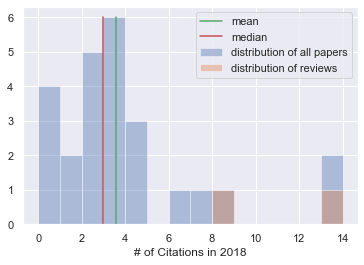

In [26]:
sns.distplot(citations, bins = 14, kde = False);
sns.distplot(citations[df['Type']=='Review'], bins = 6, kde = False);
plt.plot([mean, mean], [0, 6]);
plt.plot([med, med], [0, 6]);
plt.legend(['mean','median','distribution of all papers','distribution of reviews']);

_Density function_

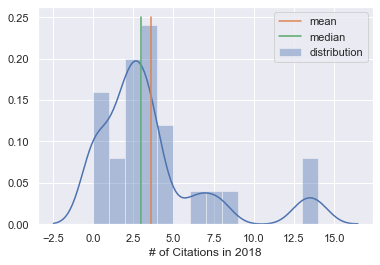

In [27]:
sns.distplot(citations, bins = 14);
plt.plot([mean, mean], [0, 0.25]);
plt.plot([med, med], [0, 0.25]);
plt.legend(['mean','median','distribution']);

_95% CI for the mean_

In [28]:
confidence = 0.95
se = sp.stats.sem(citations)
h = se * 1.96
print((mean-h,mean+h))

(2.1821010849382336, 5.0178989150617666)


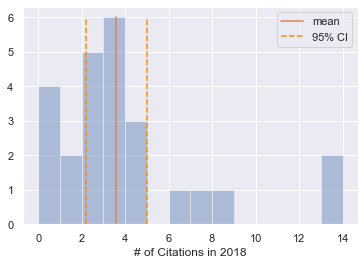

In [29]:
sns.distplot(citations, bins = 14, kde = False);
plt.plot([mean, mean], [0, 6]);
plt.plot([mean+h, mean+h], [0, 6], linestyle = '--', color = 'darkorange');
plt.plot([mean-h, mean-h], [0, 6], linestyle = '--', color = 'darkorange');
plt.legend(['mean', '95% CI']);

We try and estimate the number of papers published in _JEB_ from 2016 to 2017

In [30]:
N = 5
n = 5
year = 2016 #2016 or 2017
mean_sample = np.zeros(N)
for i in np.arange(0,N):
    x = np.mean(np.random.choice(df2[df2['Year']==year]['Articles'], size = n, replace = False));
    mean_sample[i] = x;
size_est = np.ceil(np.mean(mean_sample)*24);
print(size_est) #2016 estimate = 365, 2017 estimate = 421; Total = 786; Actual = 795

368.0


The total number of papers published from 2016 to 2017 is __795__ and the reported IF for 2018 is __3.017__

### Some observations

1. Our data suggests that reviews receive higher number of citations on average than research articles. This would be an interesting question to pursue further. 
2. Outliers in the distribution suggest that the median IF might be a better representative of the distribution than the mean IF.